# mehmetfatih

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
prices = pd.read_csv('dataset/house_prices.csv', index_col=0)
prices.tail(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Verilerinizi eğitim ve test kümelerine ayırın.

Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.

Modelinizin performansı tatmin edici mi? Açıklayın.

Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [3]:
high=prices.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]

In [4]:
Y = prices['SalePrice']
X = prices[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [6]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     390.9
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:41:00   Log-Likelihood:                -13950.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1157   BIC:                         2.798e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.105e+06   1.44e+05     -7.671      0.000   -1.39e+06   -8.22e+05
OverallQual   1.984e+04   1340.584     14.797      0.000    1.72e+04    2.25e+04
GrLivArea       45.0594      4.706      9.575      0.000      35.826      54.293
GarageCars    1.189e+04   3450.974      3.445      0.001    5118.729    1.87e+04
GarageArea      17.1388     11.590      1.479      0.139      -5.601      39.878
TotalBsmtSF     13.7012      4.649      2.947      0.003       4.580      22.822
1stFlrSF        14.2736      5.357      2.665      0.008       3.764      24.783
FullBath     -4869.7054   2968.844     -1.640      0.101   -1.07e+04     955.215
TotRmsAbvGrd  1643.7793   1250.209      1.315      0.189    -809.151    4096.710
YearBuilt      275.8121     55.419      4.977      0.000     167.079     384.545
YearRemodAdd   246.0751     70.866      3.472      0.001     107.035     385.115
==============================================================================
Omnibus:                      395.722   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39733.113
Skew:                          -0.537   Prob(JB):                         0.00
Kurtosis:                      31.553   Cond. No.                     4.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

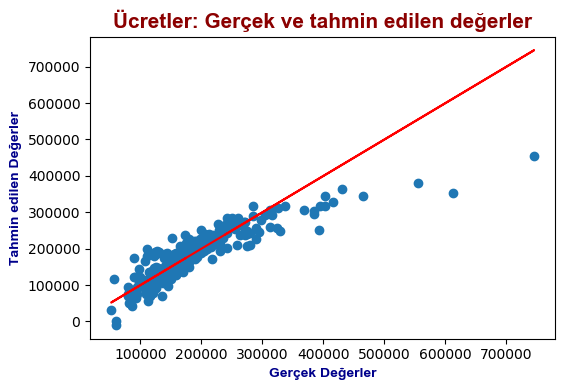

Ortalama Mutlak Hata (MAE)        : 26093.135377629398
Ortalama Kare Hata (MSE)          : 1649869554.015813
Kök Ortalama Kare Hata (RMSE)     : 40618.58631237445
Ortalama Mutlak Yüzde Hata (MAPE) : 15.166068176963106


In [7]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


In [8]:
Y = prices['SalePrice']
prices['Garage']=prices['GarageCars']*prices['GarageArea']
X = prices[['OverallQual', 'GrLivArea', 'Garage',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [10]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     510.7
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:41:00   Log-Likelihood:                -13931.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1159   BIC:                         2.793e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.038e+06    1.4e+05     -7.396      0.000   -1.31e+06   -7.63e+05
OverallQual   1.959e+04   1304.768     15.014      0.000     1.7e+04    2.21e+04
GrLivArea       46.9711      3.389     13.862      0.000      40.323      53.620
Garage          21.3250      2.055     10.379      0.000      17.294      25.356
TotalBsmtSF     10.5157      4.540      2.316      0.021       1.609      19.423
1stFlrSF        13.5326      5.252      2.577      0.010       3.228      23.837
FullBath     -3709.9081   2875.624     -1.290      0.197   -9351.919    1932.103
YearBuilt      272.8638     53.512      5.099      0.000     167.874     377.854
YearRemodAdd   225.5641     69.681      3.237      0.001      88.848     362.280
==============================================================================
Omnibus:                      439.921   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43967.235
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                      33.020   Cond. No.                     4.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

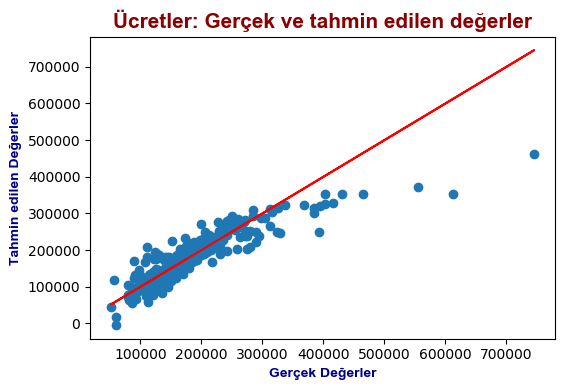

Ortalama Mutlak Hata (MSE)        : 25131.0329183034
Ortalama Kare Hata (MSE)          : 1601209386.0573678
Kök Ortalama Kare Hata (RMSE)     : 40015.11447012701
Ortalama Mutlak Yüzde Hata (MAPE) : 14.40355016210596


In [11]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### 1. MODEL DEĞERLERİ
Ortalama Mutlak Hata (MAE)        : 26093.135377629398

Ortalama Kare Hata (MSE)          : 1649869554.015813

Kök Ortalama Kare Hata (RMSE)     : 40618.58631237445

Ortalama Mutlak Yüzde Hata (MAPE) : 15.166068176963106

### 2.MODEL DEĞERLERİ

Ortalama Mutlak Hata (MSE)        : 25131.0329183034

Ortalama Kare Hata (MSE)          : 1601209386.0573678

Kök Ortalama Kare Hata (RMSE)     : 40015.11447012701

Ortalama Mutlak Yüzde Hata (MAPE) : 14.40355016210596

İkinci modelin test kümesi performansı, kullandığımız dört metriğin tümüne göre bir öncekinden daha iyidir! Önceki modele kıyasla, bu ikinci model hedefin yüksek değerlerini daha iyi tahmin ediyor olacağını düşünüyoruz. 

WORK FİNİSHED.